In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import time

params = {'figure.subplot.left': 0.0,
          'figure.figsize': (10, 10),
          'figure.subplot.right': 1.0,
          'figure.subplot.bottom': 0.0,
          'figure.subplot.top': 1.0}
plt.rcParams.update(params)

In [2]:
class MiniBatchKMeans:
    def __init__(self, clusters):
        self.__means_cfg = clusters

    def __initialize_means(self):
        means = np.zeros([self.__means_cfg, self.__features])
        for i in range(self.__means_cfg):
            index = np.random.randint(0, self.data.shape[0])
            means[i] = self.data[index]
        return means

    def __select_batch(self):
        batch = np.zeros([self.__batch_size, self.__features])
        for j in range(self.__batch_size):
            index = np.random.randint(0, self.data.shape[0])
            batch[j] = data[index]
        return batch

    def __rclc_means(self):
        for string_n in range(len(self.__cent_data)):
            if len(self.__cent_data[string_n]) > 0:
                new_cen = np.zeros([1, self.__features])
                for elem_s in range(len(self.__cent_data[string_n])):
                    new_cen = new_cen + self.__batch[self.__cent_data[string_n][elem_s]]
                dif_cen = (new_cen / (len(self.__cent_data[string_n]))).astype(int)
                if (self.__means[string_n] - dif_cen != np.zeros([1, self.__features])).all():
                    self.__means[string_n] = dif_cen

    def __init_list_of_objects(self):
        list_of_objects = list()
        for i in range(0, self.__means_cfg):
            list_of_objects.append(list())
        return list_of_objects

    def fit(self, data_g, batch_size=100, iterations=100):
        self.data = data_g
        self.__features = data.shape[1]
        self.__batch_size = batch_size

        t0 = time.time()
        self.__means = self.__initialize_means()

        for i in range(iterations):
            self.__batch = self.__select_batch()
            self.__cent_data = self.__init_list_of_objects()
            for dot in range(self.__batch_size):
                sqr_diff = (self.__means - np.array([self.__batch[dot]] * self.__means_cfg)) ** 2
                clust_dist = np.sum(sqr_diff, axis=-1)
                min_ind = clust_dist.argmin()
                self.__cent_data[min_ind].append(dot)
            self.__rclc_means()

        print("Fit done in: ")
        print("%.3fsec" % (time.time() - t0))
        return self

    def predict(self, data_g):
        t0 = time.time()
        predict_cent_data = self.__init_list_of_objects()
        for dot in range(len(data_g)):
            sqr_diff = (self.__means - np.array([data_g[dot]] * self.__means_cfg)) ** 2
            clust_dist = np.sum(sqr_diff, axis=-1)
            min_ind = clust_dist.argmin()
            predict_cent_data[min_ind].append(dot)

        new_data = np.zeros(data_g.shape)
        for row in range(len(predict_cent_data)):
            for item in range(len(predict_cent_data[row])):
                new_data[predict_cent_data[row][item]] = self.__means[row]
        print("Predict done in: ")
        print("%.3fsec" % (time.time() - t0))
        return new_data

(1535, 2048, 3)
Fit done in: 
0.343sec


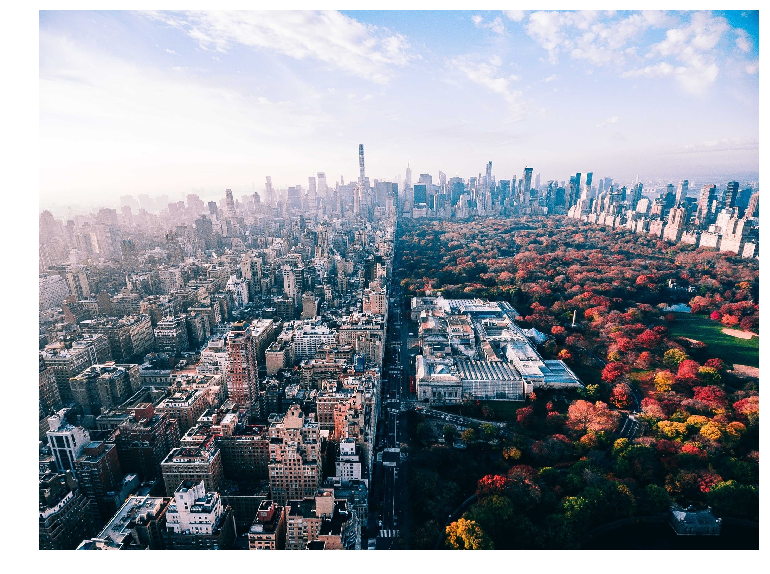

In [3]:
fig = plt.figure()
# ax = fig.gca(projection='3d')

image = mpimg.imread('./wallhaven-503777.jpg')
data = image.reshape((image.shape[0] * image.shape[1], 3))
clusters = 64
print(image.shape)
new_means = MiniBatchKMeans(clusters).fit(data)
plt.axis("off")
plt.imshow(image)
plt.show()

Predict done in: 
4.235sec
(381, 515, 3)


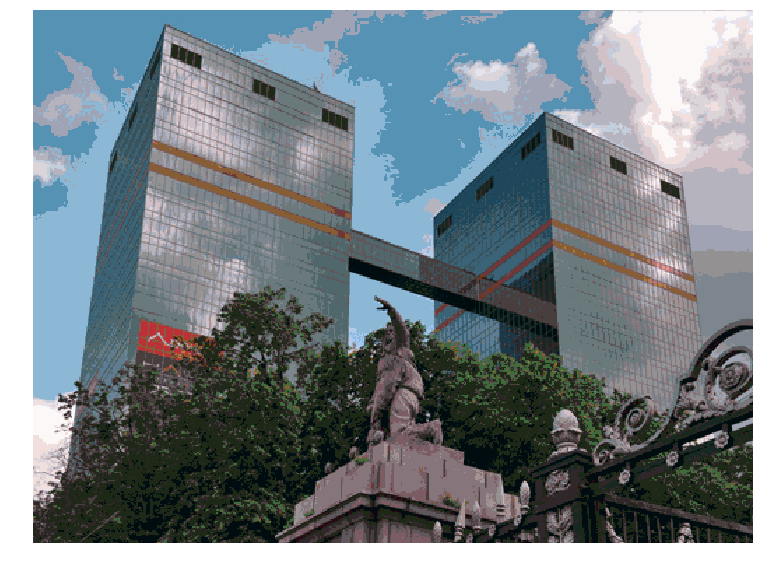

In [4]:
image_g = mpimg.imread('./mailru.jpg')
data_g = image_g.reshape((image_g.shape[0]*image_g.shape[1], 3))
new_image = new_means.predict(data_g)
print(image_g.shape)
new_image = new_image.reshape((image_g.shape[0], image_g.shape[1], 3)).astype(np.uint8)
plt.axis("off")
plt.imshow(new_image)
plt.show()

Predict done in: 
57.229sec
(1367, 2048, 3)


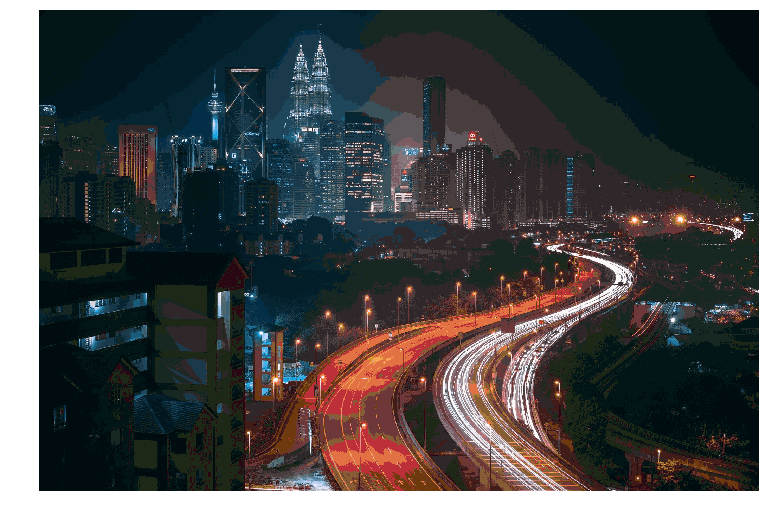

In [5]:
image_g = mpimg.imread('./wallhaven-503780.jpg')
data_g = image_g.reshape((image_g.shape[0]*image_g.shape[1], 3))
new_image = new_means.predict(data_g)
print(image_g.shape)
new_image = new_image.reshape((image_g.shape[0], image_g.shape[1], 3)).astype(np.uint8)
plt.axis("off")
plt.imshow(new_image)
plt.show()

Predict done in: 
6.369sec
(437, 700, 3)


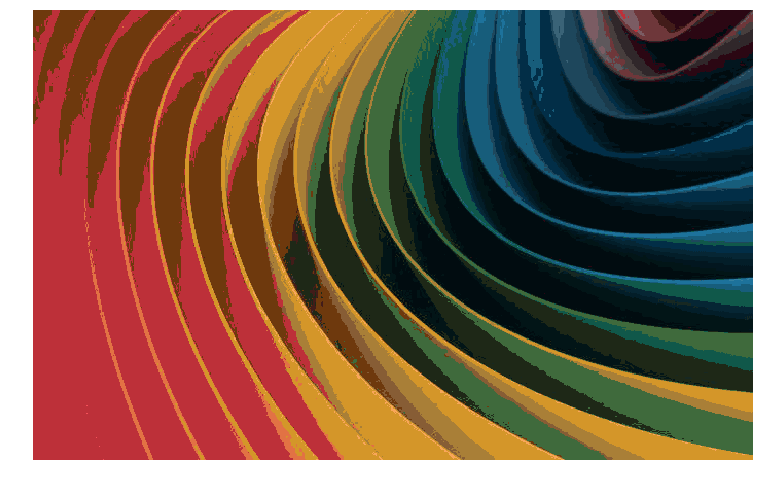

In [8]:
image_g = mpimg.imread('./colors.jpg')
data_g = image_g.reshape((image_g.shape[0]*image_g.shape[1], 3))
new_image = new_means.predict(data_g)
print(image_g.shape)
new_image = new_image.reshape((image_g.shape[0], image_g.shape[1], 3)).astype(np.uint8)
plt.axis("off")
plt.imshow(new_image)
plt.show()

Predict done in: 
63.778sec
(1535, 2048, 3)


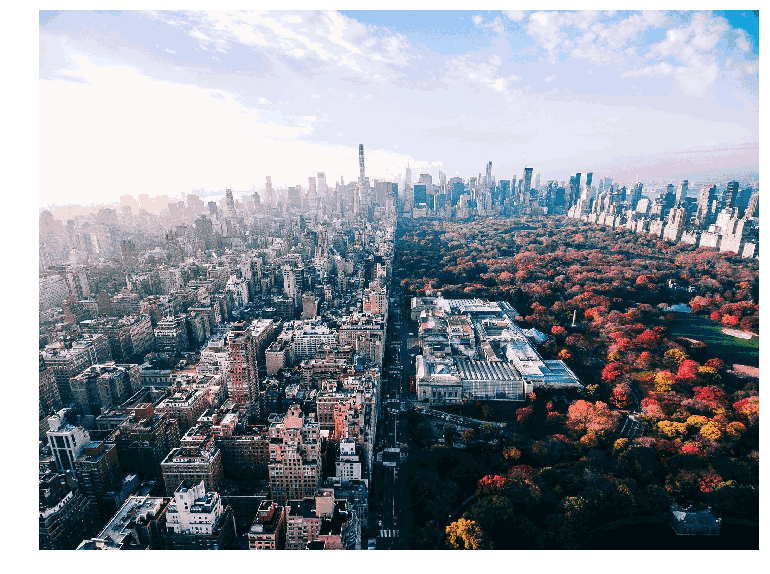

In [7]:
image_g = mpimg.imread('./wallhaven-503777.jpg')
data_g = image_g.reshape((image_g.shape[0]*image_g.shape[1], 3))
new_image = new_means.predict(data_g)
print(image_g.shape)
new_image = new_image.reshape((image_g.shape[0], image_g.shape[1], 3)).astype(np.uint8)
plt.axis("off")
plt.imshow(new_image)
plt.show()